In [ ]:


import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns




In [8]:

df = pd.read_csv("ai_impact_jobs_2010_2025.csv")


df.head()

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,...,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,...,0.81,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,...,0.04,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,0.71,False,High,19,Emerging
2,fc9d1854-3cbf-4bab-90df-77304dfc59df,2016,Nepal,South Asia,Sydney,Future Analytics,Startup,Finance,Product Manager,Junior,...,0.15,"Statistics, Project Management, Cloud Computin...",NaN,27035,3.55,0.86,False,High,2,Emerging
3,05c1c7d3-2add-4919-91eb-f6c78bfe23d1,2015,Spain,Europe,Nairobi,Global Technologies,Large,Government,Data Scientist,Mid,...,0.19,"Cloud Computing, SQL, Project Management, Comm...",NaN,72894,-2.80,0.70,False,Low,15,Emerging
4,5e739937-d1b0-44d7-935c-7ebb3fc1f6e8,2014,Taiwan,East Asia,Sydney,Future Technologies,Small,Manufacturing,ML Engineer,Lead,...,0.11,"SQL, Python, Communication, Software Engineeri...",NaN,57215,0.85,0.87,False,High,13,Emerging


In [ ]:
# Check all values
print(df.isna())

In [ ]:
print(df.isna().sum())

In [ ]:

df.duplicated()[df.duplicated()==True]

In [ ]:


print(df.shape)

print("rows: ", df.shape[0])
print("columns: ", df.shape[1])

In [ ]:

df.dtypes

In [9]:
# Statistical summary
df.describe(include='all')

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,...,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage
count,5000,5000.000000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000.000000,5000,1623,5000.00000,5000.000000,5000.000000,5000,5000,5000.000000,5000
unique,5000,NaN,44,9,14,16,5,9,10,6,...,NaN,4162,617,NaN,NaN,NaN,2,3,NaN,3
top,836b4774-702e-49ef-93d3-2f255ce1e910,NaN,Australia,South America,Toronto,Prime Systems,Small,Tech,ML Engineer,Executive,...,NaN,"SQL, Project Management, Research",deep learning,NaN,NaN,NaN,False,Low,NaN,Growing
freq,1,NaN,281,601,390,331,1031,579,558,856,...,NaN,8,72,NaN,NaN,NaN,3377,1718,NaN,2502
mean,NaN,2017.519400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.287312,NaN,NaN,63096.18480,3.015192,0.586176,NaN,NaN,9.473000,NaN
std,NaN,4.638569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.291377,NaN,NaN,31431.27151,5.968729,0.250007,NaN,NaN,5.748763,NaN
min,NaN,2010.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,15321.00000,-5.000000,0.100000,NaN,NaN,0.000000,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.070000,NaN,NaN,36575.50000,-1.580000,0.330000,NaN,NaN,4.000000,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.150000,NaN,NaN,60909.50000,1.720000,0.670000,NaN,NaN,10.000000,NaN
75%,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.520000,NaN,NaN,81811.75000,5.385000,0.790000,NaN,NaN,14.000000,NaN


### Univariate Analysis

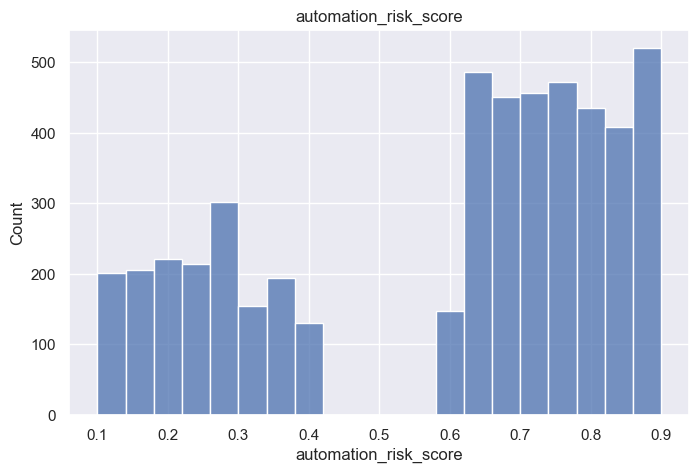

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['automation_risk_score'], bins=20)
plt.title("automation_risk_score")
plt.show()

### Distribution of Revenue

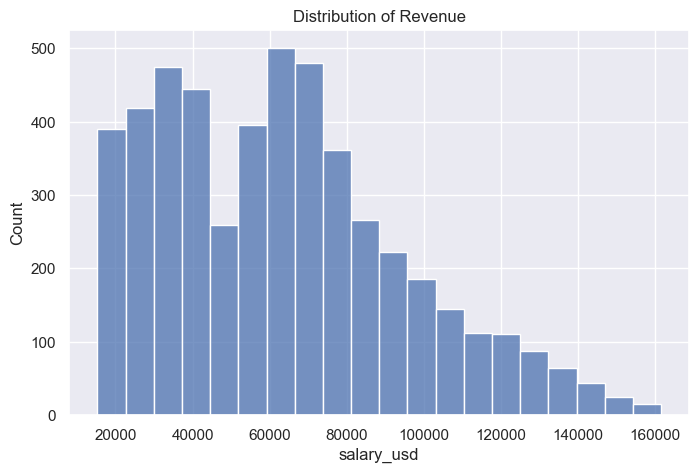

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['salary_usd'], bins=20)
plt.title("Distribution of Revenue")
plt.show()

## Bivariate Analysis

### Automation displacment in correlation to automation risk

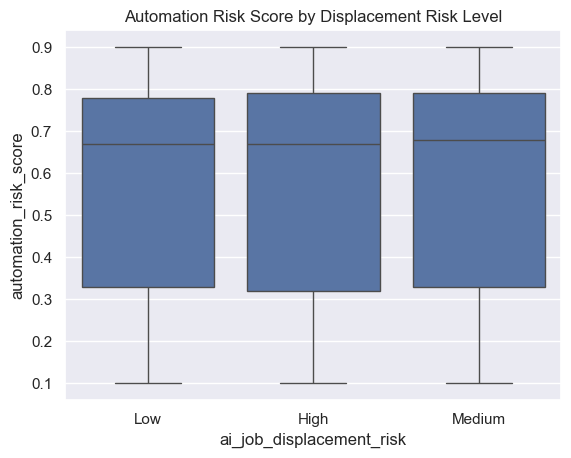

In [19]:
sns.boxplot(x='ai_job_displacement_risk',
            y='automation_risk_score',
            data=df)
plt.title("Automation Risk Score by Displacement Risk Level")
plt.show()


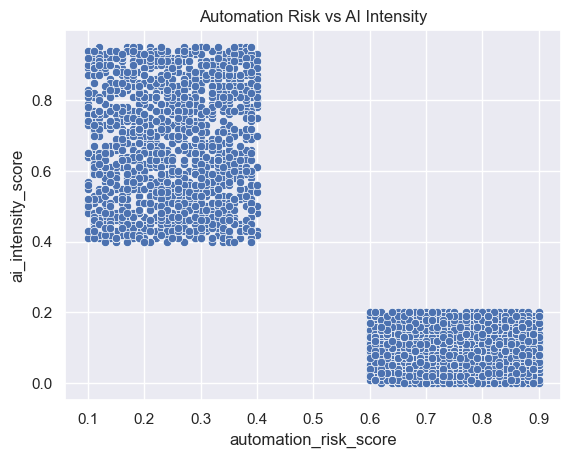

In [20]:
sns.scatterplot(x='automation_risk_score',
                y='ai_intensity_score',
                data=df)
plt.title("Automation Risk vs AI Intensity")
plt.show()


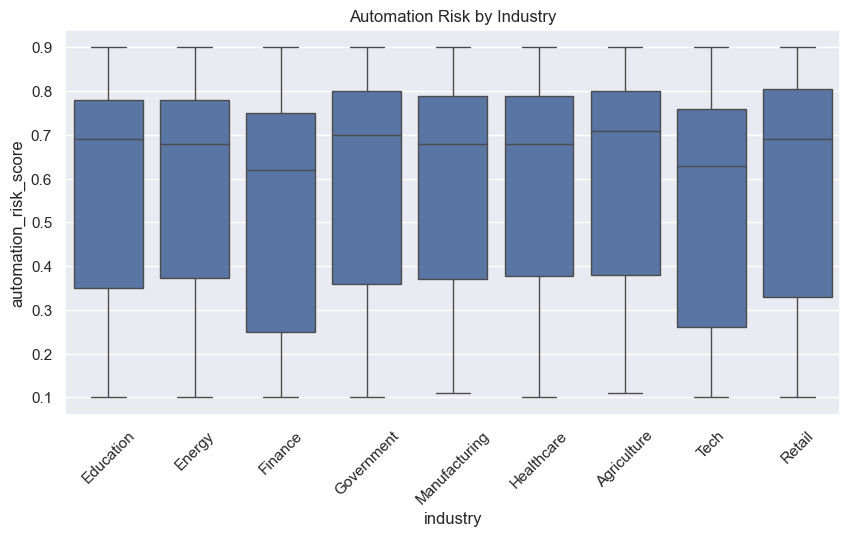

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x='industry',
            y='automation_risk_score',
            data=df)
plt.xticks(rotation=45)
plt.title("Automation Risk by Industry")
plt.show()


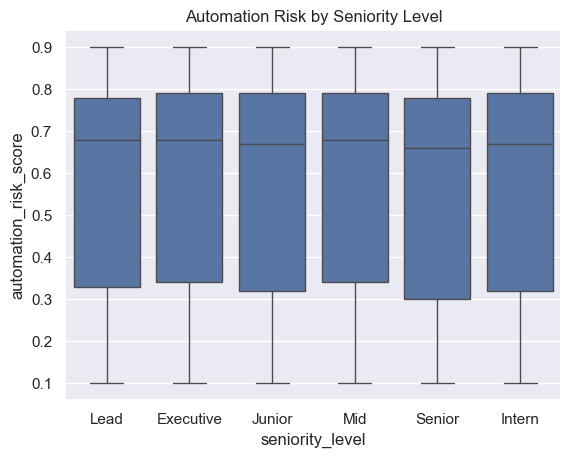

In [22]:
sns.boxplot(x='seniority_level',
            y='automation_risk_score',
            data=df)
plt.title("Automation Risk by Seniority Level")
plt.show()

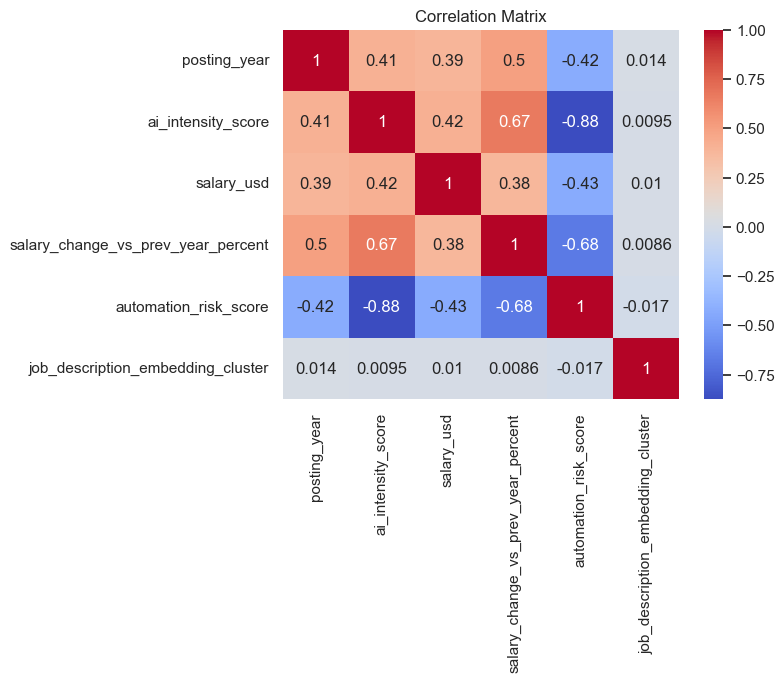

In [23]:
numeric_cols = df.select_dtypes(include=['float64','int64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()